# Data Visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
# from scipy import stats
import os

## Visualize the correlation matrix

With the outliers removed, our dataset is now ready for further analysis and model building.


/tmp/ipykernel_5975/268800871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_data.corr()


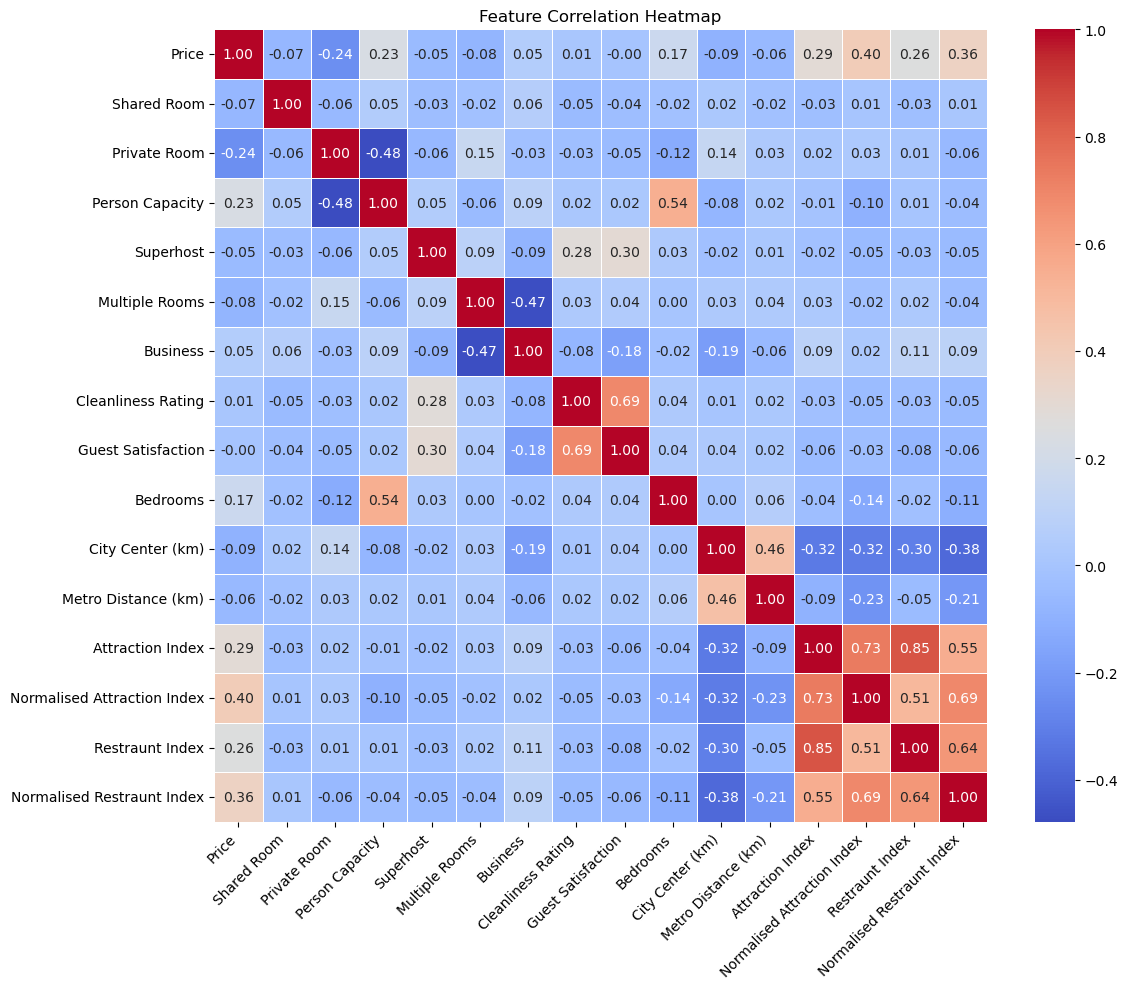

In [2]:
filtered_data =pd.read_csv('data/filtered_data.csv')
# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('figures/feature_correlation_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()


## Boxplot for comparing room types

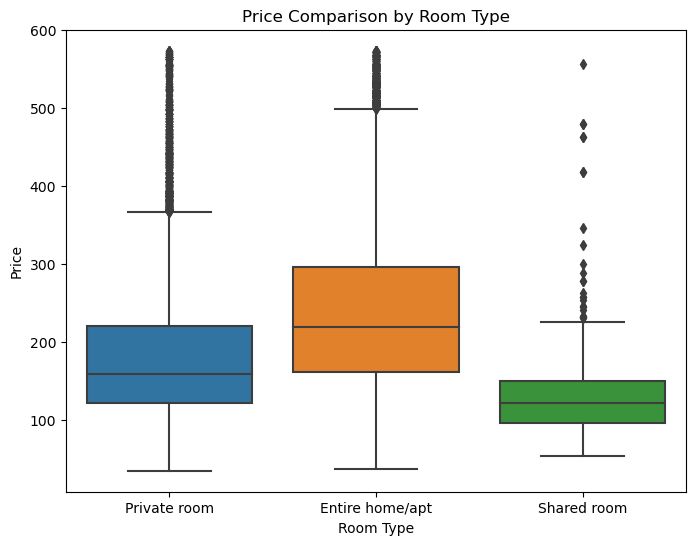

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Room Type', y='Price', data=filtered_data)
plt.title('Price Comparison by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.savefig('figures/price_comparison_by_room_type', bbox_inches='tight')
plt.show()

## Filter data by room type

In [4]:
filtered_data['Room Type'].value_counts()

Entire home/apt    26177
Private room       12873
Shared room          315
Name: Room Type, dtype: int64

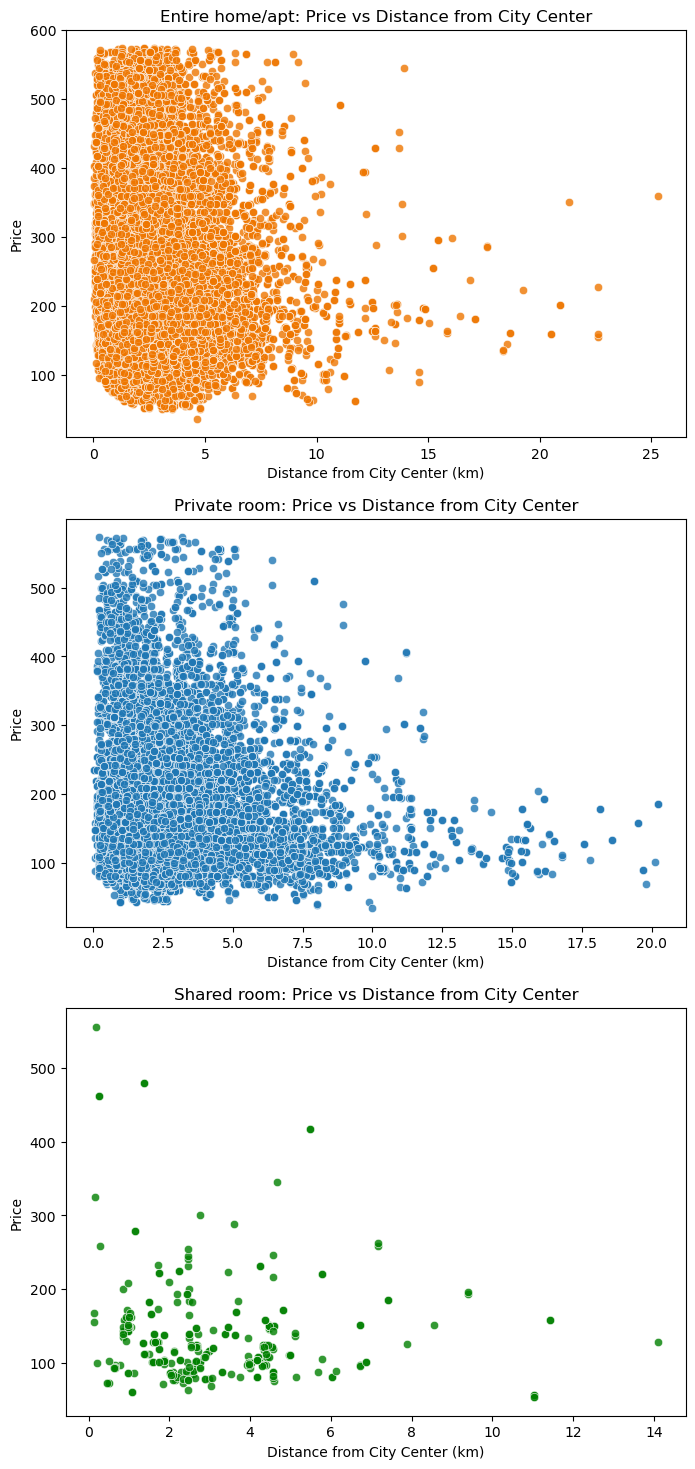

In [5]:
entire_home = filtered_data[filtered_data['Room Type'] == 'Entire home/apt']
private_room = filtered_data[filtered_data['Room Type'] == 'Private room']
shared_room = filtered_data[filtered_data['Room Type'] == 'Shared room']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Entire home/apt
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=entire_home, 
                ax=axes[0], alpha=0.8, 
                color = "#ee7600"
               )
axes[0].set_title('Entire home/apt: Price vs Distance from City Center')
axes[0].set_xlabel('Distance from City Center (km)')
axes[0].set_ylabel('Price')

# Private room
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=private_room, 
                ax=axes[1], 
                alpha=0.8
               )
axes[1].set_title('Private room: Price vs Distance from City Center')
axes[1].set_xlabel('Distance from City Center (km)')
axes[1].set_ylabel('Price')

# Shared room
sns.scatterplot(x='City Center (km)', 
                y='Price', 
                data=shared_room, 
                ax=axes[2], 
                alpha=0.8,
                color = "green"
               )
axes[2].set_title('Shared room: Price vs Distance from City Center')
axes[2].set_xlabel('Distance from City Center (km)')
axes[2].set_ylabel('Price')

# Save the figure before showing it
plt.savefig('figures/price_vs_distance_from_city_center_by_room_type.png', dpi=300, bbox_inches='tight')

plt.show()


In [6]:
city_stats = filtered_data.groupby('City')['Price'].agg(['mean', 'median'])

# Convert city names to numerical values
city_labels = filtered_data['City'].astype('category').cat.codes

# Calculate the correlation between city and price
city_price_corr = pd.DataFrame({'City': city_labels, 'Price': filtered_data['Price']}).corr(method='pearson').iloc[0, 1]

print("Correlation between city and price:", city_price_corr)
print(city_stats)
if not os.path.exists('result'):
    os.makedirs('result')

# Save city_stats DataFrame to a CSV file in the 'result' folder
city_stats.to_csv('results/city_stats.csv')

Correlation between city and price: 0.08425094730069628
                 mean      median
City                             
Amsterdam  369.803200  368.617158
Athens     145.680222  127.715417
Barcelona  235.001931  196.895292
Berlin     214.763642  185.566047
Budapest   168.058828  152.277107
Lisbon     232.385012  223.264540
Paris      309.631882  289.868580
Rome       198.352167  182.124237
Vienna     223.813612  206.624126


## Visualize the relationship between city and price

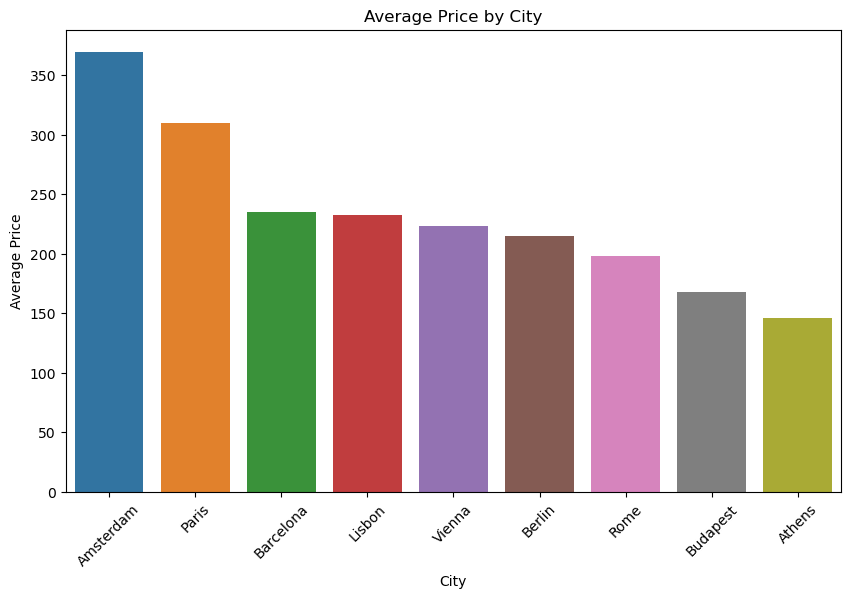

In [7]:
# Calculate the average price for each city
city_price = filtered_data.groupby('City')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=city_price.index, y=city_price.values)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('figures/average_price_by_city.png', bbox_inches='tight')
plt.show()

## Loop through the x variables and create a separate plot for each

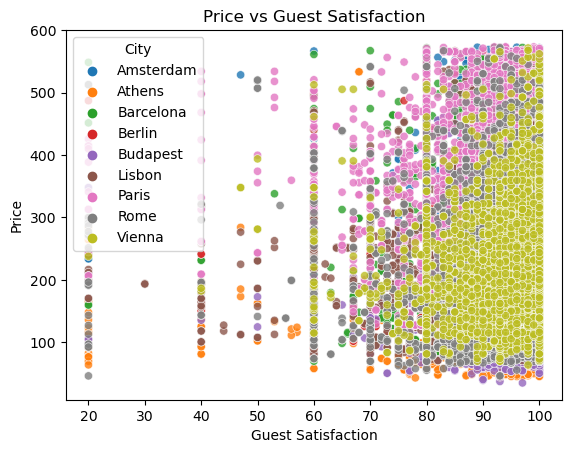

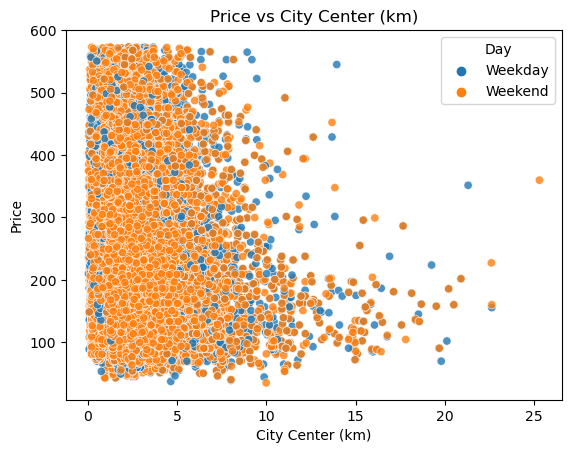

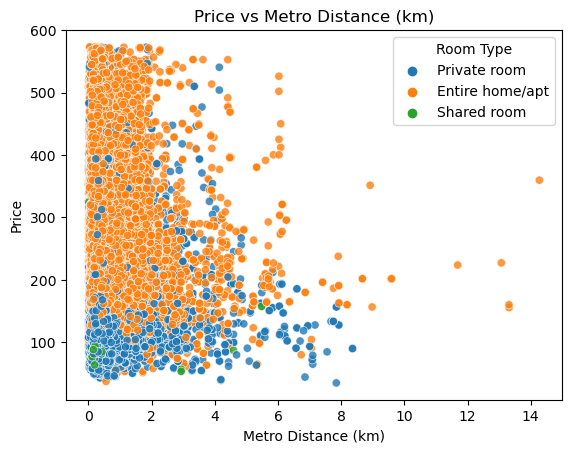

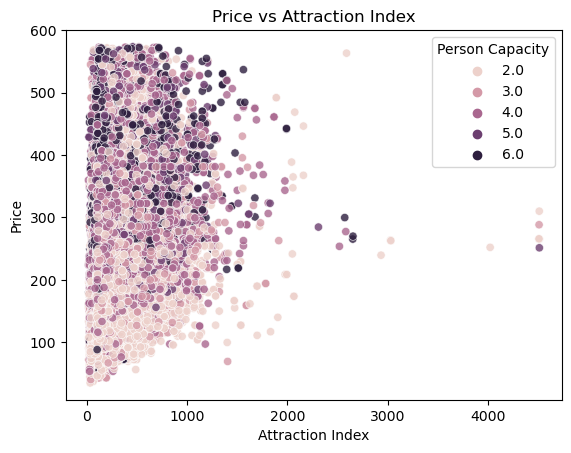

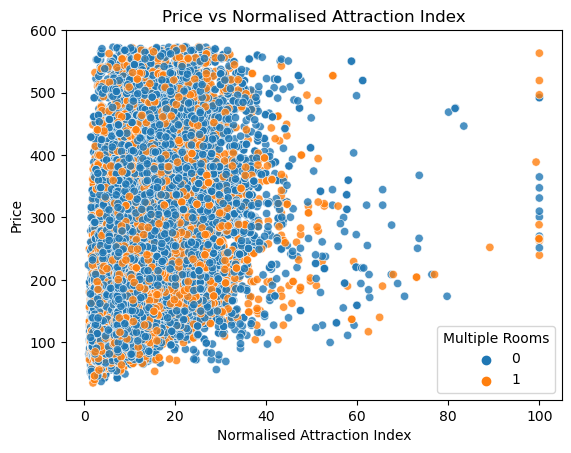

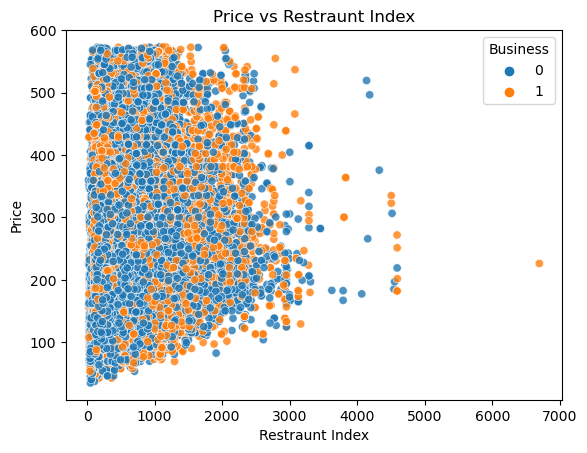

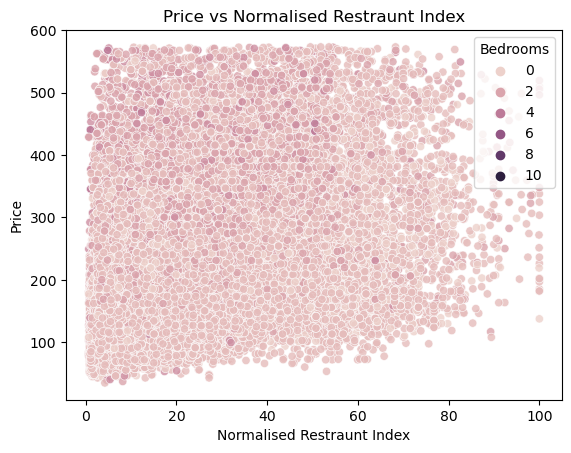

In [8]:
label=['City', 'Day', 'Room Type',
       'Person Capacity', 'Multiple Rooms', 'Business',
       'Bedrooms']

x_vars = ['Guest Satisfaction','City Center (km)', 'Metro Distance (km)', 
          'Attraction Index', 'Normalised Attraction Index', 
          'Restraunt Index', 'Normalised Restraunt Index']
y_var = 'Price'

for i, x_var in enumerate(x_vars):
    plt.figure(i)
    sns.scatterplot(x=filtered_data[x_var], y=filtered_data[y_var], alpha=0.8, hue=filtered_data[label[i]])
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.savefig(f'figures/{y_var}_vs_{x_var}.png', dpi=300, bbox_inches='tight')
plt.show()